<h1>Nama: Muhammad Athar Althariq Irawan<br>
Kelas: SK6A<br>
NIM: 09011282025043
<h1>

<h2>Klasifikasi LVOT dan RVOT pada jantung janin menggunakan CNN<h2>

<h3>Import Library<h3>

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os
from PIL import Image
import random

<h3>Pengaturan Direktori<h3>

In [35]:
# alamat direktori
train_dir = r'D:\0DOKUMENUNSRI\semester6\jaringan saraf tiruan\koding\uuus\train'
test_dir = r'D:\0DOKUMENUNSRI\semester6\jaringan saraf tiruan\koding\uuus\tes'

<h3>Cek Gambar<h3>

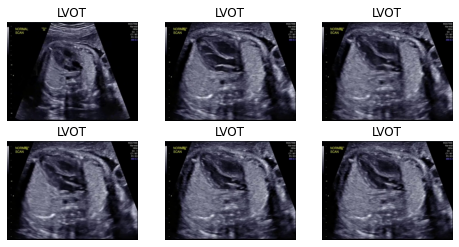

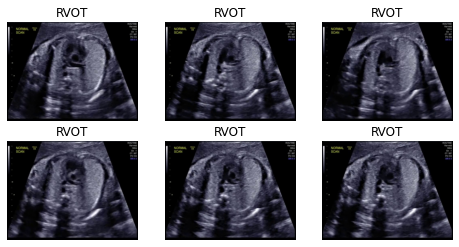

In [36]:
# list nama kelas
class_name = 'LVOT'
class_name2 = 'RVOT'

# list path gambar pada kelas yang dipilih
image_paths = os.listdir(os.path.join(train_dir, class_name))
image_paths2 = os.listdir(os.path.join(train_dir, class_name2))

# memilih 6 gambar secara acak dari kelas yang dipilih
image_paths = random.sample(image_paths, 6)
image_paths2 = random.sample(image_paths2, 6)

# menampilkan 6 gambar dari kelas yang dipilih
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    img = image.load_img(os.path.join(train_dir, class_name, image_paths[i]))
    ax.imshow(img)
    ax.set_title(f"{class_name}")
    ax.axis('off')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    img = image.load_img(os.path.join(train_dir, class_name2, image_paths2[i]))
    ax.imshow(img)
    ax.set_title(f"{class_name2}")
    ax.axis('off')
plt.show()

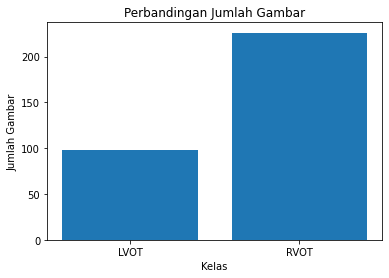

In [37]:
class_names = ['LVOT', 'RVOT']

# menghitung jumlah gambar pada setiap kelas
num_images = []
for class_name in class_names:
    num_images.append(len(os.listdir(os.path.join(train_dir, class_name))))

# menampilkan grafik perbandingan jumlah gambar pada dua kelas
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(class_names, num_images)
ax.set_title('Perbandingan Jumlah Gambar')
ax.set_xlabel('Kelas')
ax.set_ylabel('Jumlah Gambar')
plt.show()

<h3>Preprosesing Dataset<h3>

In [38]:
# ukuran gambar dan batch nantinya
image_size = 256
batch_size = 32

In [39]:
# augmentasi data train
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# yang tes cmn rescale aja
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
# mempersiapkan data di preprosesing untuk train dan tes nantinya
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 324 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


<h4>Cek gambar setelah augmentasi<h4>

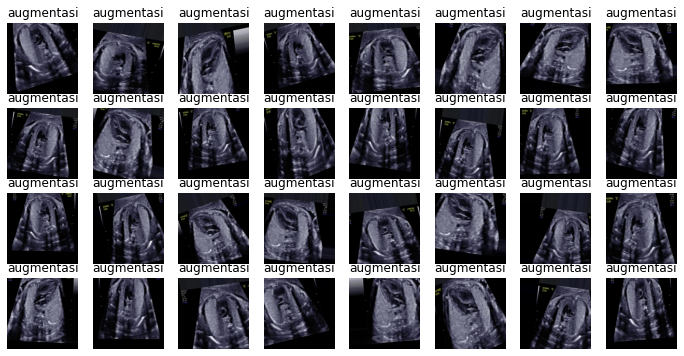

In [41]:
augmented_images, _ = train_generator.next()

# memvisualisasikan gambar setelah augmentasi
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.set_title('augmentasi')
    ax.imshow(augmented_images[i])
    ax.axis('off')
plt.show()

<h3>Pembuatan model CNN<h3>

In [42]:
# model 1
# 5 conv net dan maxpool,1 flatten 2 dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

<h3>Train Model<h3>

In [45]:
epochs = 10
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=test_generator)


Epoch 1/10
11/11 [==============================] - 14s 1s/step - loss: 0.6354 - accuracy: 0.6852 - val_loss: 0.6923 - val_accuracy: 0.5789
Epoch 2/10
11/11 [==============================] - 13s 1s/step - loss: 0.6373 - accuracy: 0.6975 - val_loss: 0.6804 - val_accuracy: 0.5789
Epoch 3/10
11/11 [==============================] - 13s 1s/step - loss: 0.6256 - accuracy: 0.6975 - val_loss: 0.6936 - val_accuracy: 0.5789
Epoch 4/10
11/11 [==============================] - 13s 1s/step - loss: 0.5832 - accuracy: 0.6975 - val_loss: 0.7809 - val_accuracy: 0.5789
Epoch 5/10
11/11 [==============================] - 13s 1s/step - loss: 0.5878 - accuracy: 0.7191 - val_loss: 0.6456 - val_accuracy: 0.5789
Epoch 6/10
11/11 [==============================] - 13s 1s/step - loss: 0.4694 - accuracy: 0.7500 - val_loss: 0.7117 - val_accuracy: 0.5789
Epoch 7/10
11/11 [==============================] - 13s 1s/step - loss: 0.3280 - accuracy: 0.8889 - val_loss: 0.7289 - val_accuracy: 0.7895
Epoch 8/10
11/11 [==

<h3>Evaluasi<h3>

In [46]:
test_loss, test_acc = model.evaluate(test_generator)
print('akurasi:', test_acc)

1/1 [==============================] - 0s 265ms/step - loss: 0.4316 - accuracy: 0.7895
akurasi: 0.7894737124443054


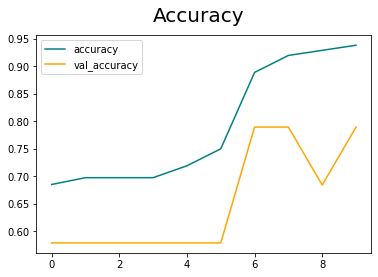

In [47]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

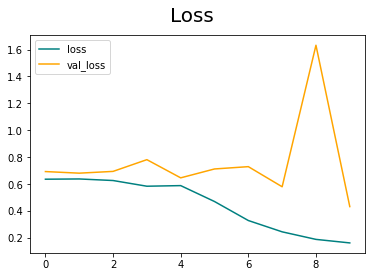

In [48]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h3>Tes Model<h3>

In [49]:
img_path = r'D:\0DOKUMENUNSRI\semester6\jaringan saraf tiruan\koding\uuus\tes\RVOT\Normal_RVOT_257.jpg'
img = image.load_img(img_path, target_size=(image_size, image_size))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [50]:
prediction = model.predict(img)

if prediction < 0.5:
    label="LVOT"
else:
    label="RVOT"

1/1 [==============================] - 0s 152ms/step


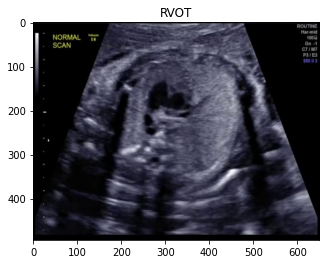

In [51]:
plt.imshow(plt.imread(img_path))
plt.title(label)
plt.show()

In [52]:
model.predict(img)

1/1 [==============================] - 0s 48ms/step


array([[1.]], dtype=float32)

<h3>Simpan Model<h3>

In [53]:
model.save('model102.h5')
# model102.h5 bagus
# model110.h5 bagus

<h3>Tes folder<h3>

1/1 [==============================] - 0s 48ms/step


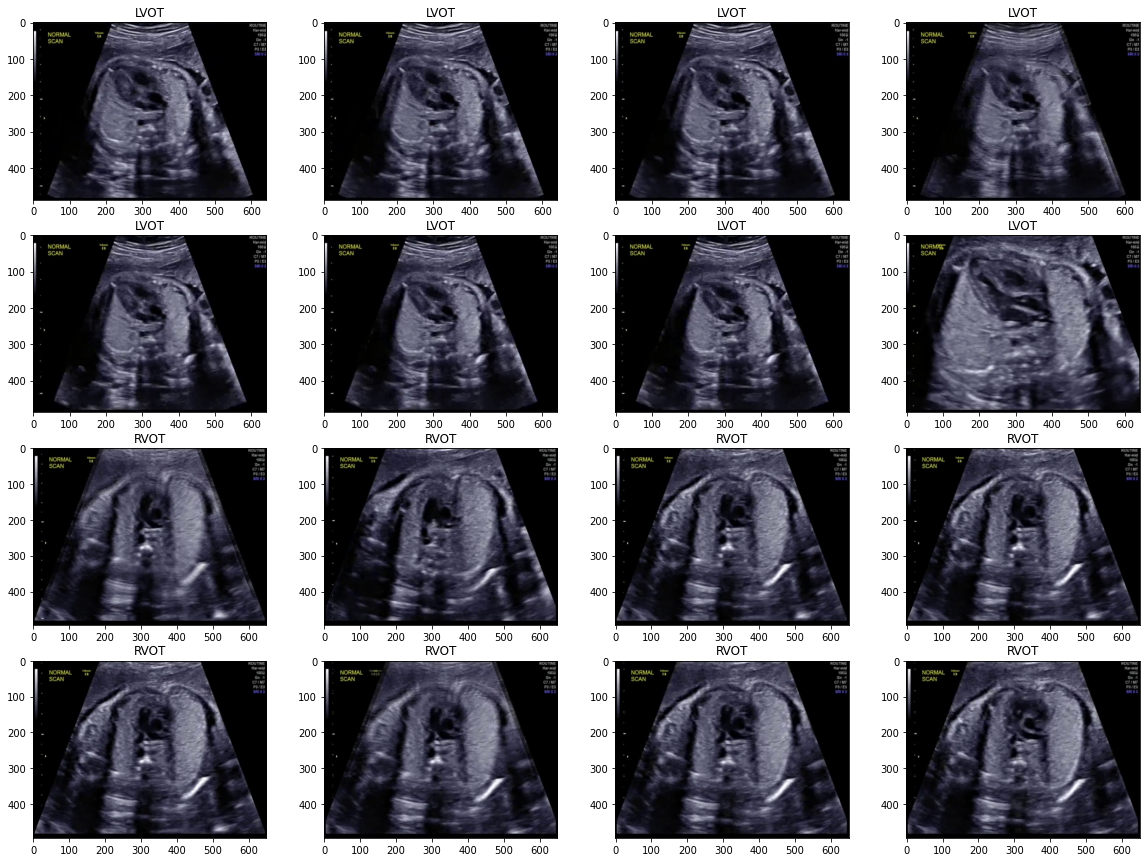

In [56]:
model = tf.keras.models.load_model('model102.h5')
test_dir = r'D:\0DOKUMENUNSRI\semester6\jaringan saraf tiruan\koding\uuus\foltes'

fig, axs = plt.subplots(4, len(os.listdir(test_dir)) // 4, figsize=(20, 15))

for i, img_name in enumerate(os.listdir(test_dir)):
    img_path = os.path.join(test_dir, img_name)
    img = image.load_img(img_path, target_size=(image_size, image_size))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    if prediction < 0.5:
        label = "LVOT"
    else:
        label = "RVOT"
    axs.flatten()[i].imshow(plt.imread(img_path))
    axs.flatten()[i].set_title(label)

plt.show()